In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/probingportscandataset/malicious_dataset.csv
/kaggle/input/probingportscandataset/normal_dataset.csv


In [2]:
df_normal = pd.read_csv("/kaggle/input/probingportscandataset/normal_dataset.csv")
df_normal.head()

,frame_info.encap_type,frame_info.time,frame_info.time_epoch,frame_info.number,frame_info.len,frame_info.cap_len,eth.type,ip.version,ip.hdr_len,ip.tos,...,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,tcp.urgent_pointer,tcp.options.mss_val
0,1,"Nov 21, 2019 02:00:00.309420000 -03",1.574312e+09,2,1474,74,0x000086dd,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,131.0,0x0000308f,0.0,NaN
1,1,"Nov 21, 2019 02:00:00.313671000 -03",1.574312e+09,7,54,54,0x00000800,4.0,20.0,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,1024.0,0x0000efab,0.0,NaN
2,1,"Nov 21, 2019 02:00:00.315642000 -03",1.574312e+09,10,70,70,0x00000800,4.0,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,"Nov 21, 2019 02:00:00.316152000 -03",1.574312e+09,12,551,66,0x00000800,4.0,20.0,NaN,...,0.0,0.0,1.0,1.0,0.0,0.0,252.0,0x0000ee05,0.0,NaN
4,1,"Nov 21, 2019 02:00:00.316227000 -03",1.574312e+09,14,94,94,0x00000800,4.0,20.0,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,4677.0,0x000048db,0.0,NaN


In [3]:
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103094 entries, 0 to 103093
Data columns (total 41 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   frame_info.encap_type  103094 non-null  int64  
 1   frame_info.time        103094 non-null  object 
 2   frame_info.time_epoch  103094 non-null  float64
 3   frame_info.number      103094 non-null  int64  
 4   frame_info.len         103094 non-null  int64  
 5   frame_info.cap_len     103094 non-null  int64  
 6   eth.type               103094 non-null  object 
 7   ip.version             91762 non-null   float64
 8   ip.hdr_len             91762 non-null   float64
 9   ip.tos                 0 non-null       float64
 10  ip.id                  91762 non-null   object 
 11  ip.flags               91762 non-null   object 
 12  ip.flags.rb            91762 non-null   float64
 13  ip.flags.df            91762 non-null   float64
 14  ip.flags.mf            91762 non-nul

In [4]:
df_malicious = pd.read_csv("/kaggle/input/probingportscandataset/malicious_dataset.csv")
df_malicious.head()

,frame_info.encap_type,frame_info.time,frame_info.time_epoch,frame_info.number,frame_info.len,frame_info.cap_len,eth.type,ip.version,ip.hdr_len,ip.tos,...,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,tcp.urgent_pointer,tcp.options.mss_val,label
0,1,"Sep 2, 2020 21:04:37.063530000 -03",1.599091e+09,1,74,74,0x00000800,4,20,NaN,...,0,0,0,0,0,64240,0x0000c9e9,0,1410.0,nmap_null
1,1,"Sep 2, 2020 21:04:39.363792000 -03",1.599091e+09,2,74,74,0x00000800,4,20,NaN,...,0,0,0,0,0,64240,0x000090cb,0,1410.0,nmap_null
2,1,"Aug 27, 2020 21:12:52.279948000 -03",1.598574e+09,1,74,74,0x00000800,4,20,NaN,...,0,0,0,0,0,64240,0x0000b178,0,1440.0,nmap_connect
3,1,"Aug 27, 2020 21:12:56.039540000 -03",1.598574e+09,2,74,74,0x00000800,4,20,NaN,...,0,0,0,0,0,64240,0x000053fc,0,1440.0,nmap_connect
4,1,"Aug 27, 2020 21:12:56.052899000 -03",1.598574e+09,3,74,74,0x00000800,4,20,NaN,...,0,0,0,0,0,64240,0x0000401e,0,1440.0,nmap_connect


In [5]:
df_malicious.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193315 entries, 0 to 193314
Data columns (total 42 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   frame_info.encap_type  193315 non-null  int64  
 1   frame_info.time        193315 non-null  object 
 2   frame_info.time_epoch  193315 non-null  float64
 3   frame_info.number      193315 non-null  int64  
 4   frame_info.len         193315 non-null  int64  
 5   frame_info.cap_len     193315 non-null  int64  
 6   eth.type               193315 non-null  object 
 7   ip.version             193315 non-null  int64  
 8   ip.hdr_len             193315 non-null  int64  
 9   ip.tos                 0 non-null       float64
 10  ip.id                  193315 non-null  object 
 11  ip.flags               193315 non-null  object 
 12  ip.flags.rb            193315 non-null  int64  
 13  ip.flags.df            193315 non-null  int64  
 14  ip.flags.mf            193315 non-nu

In [6]:
df_normal['label'] = 'normal'

In [7]:
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103094 entries, 0 to 103093
Data columns (total 42 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   frame_info.encap_type  103094 non-null  int64  
 1   frame_info.time        103094 non-null  object 
 2   frame_info.time_epoch  103094 non-null  float64
 3   frame_info.number      103094 non-null  int64  
 4   frame_info.len         103094 non-null  int64  
 5   frame_info.cap_len     103094 non-null  int64  
 6   eth.type               103094 non-null  object 
 7   ip.version             91762 non-null   float64
 8   ip.hdr_len             91762 non-null   float64
 9   ip.tos                 0 non-null       float64
 10  ip.id                  91762 non-null   object 
 11  ip.flags               91762 non-null   object 
 12  ip.flags.rb            91762 non-null   float64
 13  ip.flags.df            91762 non-null   float64
 14  ip.flags.mf            91762 non-nul

In [8]:
df_normal.tail()

,frame_info.encap_type,frame_info.time,frame_info.time_epoch,frame_info.number,frame_info.len,frame_info.cap_len,eth.type,ip.version,ip.hdr_len,ip.tos,...,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,tcp.urgent_pointer,tcp.options.mss_val,label
103089,1,"Nov 21, 2019 02:01:18.308255000 -03",1.574312e+09,204149,1464,86,0x000086dd,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,240.0,0x00005cae,0.0,NaN,normal
103090,1,"Nov 21, 2019 02:01:18.308601000 -03",1.574312e+09,204150,54,54,0x00000800,4.0,20.0,NaN,...,0.0,0.0,0.0,0.0,0.0,1024.0,0x00006e28,0.0,NaN,normal
103091,1,"Nov 21, 2019 02:01:18.309464000 -03",1.574312e+09,204152,1440,66,0x00000800,4.0,20.0,NaN,...,0.0,0.0,1.0,0.0,0.0,118.0,0x00006cf4,0.0,NaN,normal
103092,1,"Nov 21, 2019 02:01:18.311302000 -03",1.574312e+09,204154,1440,66,0x00000800,4.0,20.0,NaN,...,0.0,0.0,1.0,0.0,0.0,118.0,0x000016c3,0.0,NaN,normal
103093,1,"Nov 21, 2019 02:01:18.311362000 -03",1.574312e+09,204155,54,54,0x00000800,4.0,20.0,NaN,...,0.0,0.0,0.0,0.0,0.0,1024.0,0x0000bf71,0.0,NaN,normal


In [9]:
df = pd.concat([df_normal,df_malicious],ignore_index=True)
df.head()

,frame_info.encap_type,frame_info.time,frame_info.time_epoch,frame_info.number,frame_info.len,frame_info.cap_len,eth.type,ip.version,ip.hdr_len,ip.tos,...,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,tcp.urgent_pointer,tcp.options.mss_val,label
0,1,"Nov 21, 2019 02:00:00.309420000 -03",1.574312e+09,2,1474,74,0x000086dd,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,131.0,0x0000308f,0.0,NaN,normal
1,1,"Nov 21, 2019 02:00:00.313671000 -03",1.574312e+09,7,54,54,0x00000800,4.0,20.0,NaN,...,0.0,0.0,0.0,0.0,0.0,1024.0,0x0000efab,0.0,NaN,normal
2,1,"Nov 21, 2019 02:00:00.315642000 -03",1.574312e+09,10,70,70,0x00000800,4.0,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
3,1,"Nov 21, 2019 02:00:00.316152000 -03",1.574312e+09,12,551,66,0x00000800,4.0,20.0,NaN,...,0.0,1.0,1.0,0.0,0.0,252.0,0x0000ee05,0.0,NaN,normal
4,1,"Nov 21, 2019 02:00:00.316227000 -03",1.574312e+09,14,94,94,0x00000800,4.0,20.0,NaN,...,0.0,0.0,1.0,0.0,0.0,4677.0,0x000048db,0.0,NaN,normal


In [10]:
df_malicious.shape[0] + df_normal.shape[0] == df.shape[0]

True

In [11]:
(df_normal.shape[1] == df.shape[1]) & (df_malicious.shape[1] == df.shape[1])

True

In [12]:
df = df.sample(frac=1).reset_index(drop=True)

In [13]:
df.head()

,frame_info.encap_type,frame_info.time,frame_info.time_epoch,frame_info.number,frame_info.len,frame_info.cap_len,eth.type,ip.version,ip.hdr_len,ip.tos,...,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,tcp.urgent_pointer,tcp.options.mss_val,label
0,1,"Sep 8, 2020 18:17:10.951860000 -03",1.599600e+09,844,54,54,0x00000800,4.0,20.0,NaN,...,0.0,0.0,1.0,0.0,0.0,512.0,0x0000b37a,0.0,NaN,hping_ack
1,1,"Aug 29, 2020 17:35:29.800355000 -03",1.598733e+09,1621,74,74,0x00000800,4.0,20.0,NaN,...,0.0,0.0,0.0,0.0,0.0,64240.0,0x0000fe2c,0.0,1440.0,zmap
2,1,"Sep 8, 2020 18:51:51.419235000 -03",1.599602e+09,875,54,54,0x00000800,4.0,20.0,NaN,...,0.0,0.0,0.0,0.0,0.0,512.0,0x00005636,0.0,NaN,hping_fin
3,1,"Nov 21, 2019 02:00:16.120892000 -03",1.574312e+09,41522,54,54,0x00000800,4.0,20.0,NaN,...,0.0,0.0,0.0,0.0,0.0,65535.0,0x0000fc4e,0.0,NaN,normal
4,1,"Aug 23, 2020 22:23:33.848372000 -03",1.598232e+09,452,66,66,0x00000800,4.0,20.0,NaN,...,0.0,0.0,1.0,0.0,0.0,64512.0,0x0000fe77,0.0,NaN,nmap_connect


In [14]:
df['label'].unique(),len(df['label'].unique())

(array(['hping_ack', 'zmap', 'hping_fin', 'normal', 'nmap_connect',
        'hping_syn', 'nmap_syn', 'nmap_null', 'unicorn_syn', 'nmap_maimon',
        'hping_xmas', 'nmap_fin', 'unicorn_fxmas', 'nmap_window',
        'unicorn_conn', 'masscan', 'hping_null', 'nmap_xmas', 'nmap_ack',
        'unicorn_null', 'unicorn_xmas'], dtype=object),
 21)

In [15]:
import matplotlib.pyplot as plt

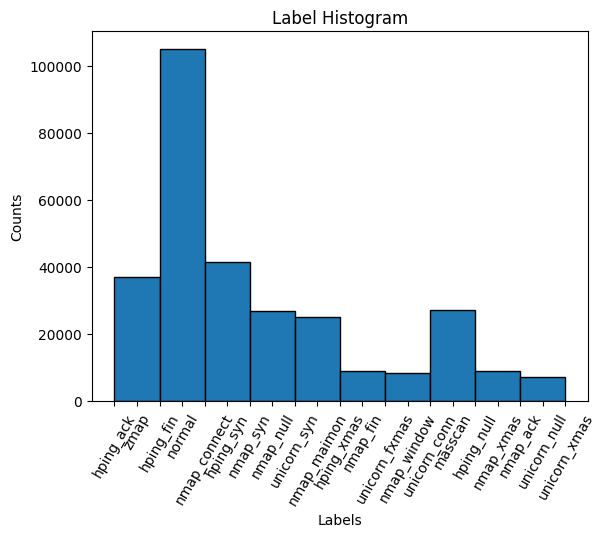

In [16]:
plt.hist(df['label'],edgecolor='black')
plt.xticks(rotation=60)
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Label Histogram')
plt.show()

In [17]:
df['label'] = df['label'].apply(lambda x: 'scan' if x != 'normal' else x)

In [18]:
df['label'].unique(),len(df['label'].unique())

(array(['scan', 'normal'], dtype=object), 2)

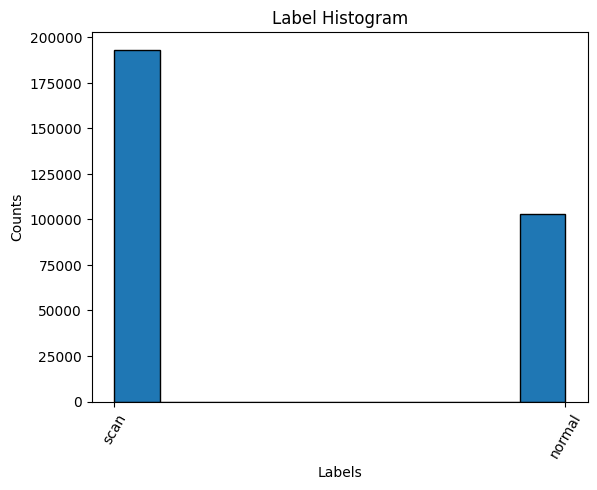

In [19]:
plt.hist(df['label'],edgecolor='black')
plt.xticks(rotation=60)
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Label Histogram')
plt.show()

In [20]:
for col_name in df.columns:
    print(f"Column Name: {col_name}, Unique Value Counts: {len(df[col_name].unique())}")
    if (len(df[col_name].unique()) < 22):
        print(df[col_name].unique())

Column Name: frame_info.encap_type, Unique Value Counts: 1
[1]
Column Name: frame_info.time, Unique Value Counts: 275339
Column Name: frame_info.time_epoch, Unique Value Counts: 275339
Column Name: frame_info.number, Unique Value Counts: 104216
Column Name: frame_info.len, Unique Value Counts: 1439
Column Name: frame_info.cap_len, Unique Value Counts: 12
[54 74 66 78 86 62 58 90 96 94 70 82]
Column Name: eth.type, Unique Value Counts: 2
['0x00000800' '0x000086dd']
Column Name: ip.version, Unique Value Counts: 2
[ 4. nan]
Column Name: ip.hdr_len, Unique Value Counts: 2
[20. nan]
Column Name: ip.tos, Unique Value Counts: 1
[nan]
Column Name: ip.id, Unique Value Counts: 64163
Column Name: ip.flags, Unique Value Counts: 3
['0x00000000' '0x00004000' nan]
Column Name: ip.flags.rb, Unique Value Counts: 2
[ 0. nan]
Column Name: ip.flags.df, Unique Value Counts: 3
[ 0.  1. nan]
Column Name: ip.flags.mf, Unique Value Counts: 2
[ 0. nan]
Column Name: ip.frag_offset, Unique Value Counts: 2
[ 0. na

In [21]:
drop_names = ["eth.type","ip.version","ip.hdr_len","ip.tos","ip.id","ip.flags.rb",
                "ip.flags.mf","ip.frag_offset","frame_info.number",
              "frame_info.number","frame_info.encap_type","tcp.len",
             "tcp.urgent_pointer","tcp.options.mss_val",
              "frame_info.time","ip.dst","ip.src","frame_info.time_epoch"]

In [22]:
df = df.drop(columns=drop_names)

In [23]:
for col_name in df.columns:
    print(f"Column Name: {col_name}, Unique Value Counts: {len(df[col_name].unique())}")
    if (len(df[col_name].unique()) < 60):
        print(df[col_name].unique())

Column Name: frame_info.len, Unique Value Counts: 1439
Column Name: frame_info.cap_len, Unique Value Counts: 12
[54 74 66 78 86 62 58 90 96 94 70 82]
Column Name: ip.flags, Unique Value Counts: 3
['0x00000000' '0x00004000' nan]
Column Name: ip.flags.df, Unique Value Counts: 3
[ 0.  1. nan]
Column Name: ip.ttl, Unique Value Counts: 120
Column Name: ip.proto, Unique Value Counts: 3
[ 6. nan  1.]
Column Name: ip.checksum, Unique Value Counts: 64216
Column Name: ip.len, Unique Value Counts: 1330
Column Name: ip.dsfield, Unique Value Counts: 20
['0x00000000' '0x0000000a' '0x00000008' '0x00000020' nan '0x00000002'
 '0x000000e0' '0x00000010' '0x00000018' '0x00000003' '0x000000c0'
 '0x00000048' '0x000000d0' '0x00000004' '0x0000001a' '0x00000014'
 '0x000000b8' '0x00000038' '0x000000c2' '0x0000000c']
Column Name: tcp.srcport, Unique Value Counts: 30177
Column Name: tcp.dstport, Unique Value Counts: 12830
Column Name: tcp.seq, Unique Value Counts: 54548
Column Name: tcp.ack, Unique Value Counts: 

In [24]:
df.columns

Index(['frame_info.len', 'frame_info.cap_len', 'ip.flags', 'ip.flags.df',
       'ip.ttl', 'ip.proto', 'ip.checksum', 'ip.len', 'ip.dsfield',
       'tcp.srcport', 'tcp.dstport', 'tcp.seq', 'tcp.ack', 'tcp.hdr_len',
       'tcp.flags', 'tcp.flags.fin', 'tcp.flags.syn', 'tcp.flags.reset',
       'tcp.flags.push', 'tcp.flags.ack', 'tcp.flags.urg', 'tcp.flags.cwr',
       'tcp.window_size', 'tcp.checksum', 'label'],
      dtype='object')

In [25]:
#df.shape

In [26]:
#df = df.dropna()

In [27]:
df = df.dropna(subset=['tcp.srcport','ip.ttl'])

In [28]:
df.isna().sum()

frame_info.len        0
frame_info.cap_len    0
ip.flags              0
ip.flags.df           0
ip.ttl                0
ip.proto              0
ip.checksum           0
ip.len                0
ip.dsfield            0
tcp.srcport           0
tcp.dstport           0
tcp.seq               0
tcp.ack               0
tcp.hdr_len           0
tcp.flags             0
tcp.flags.fin         0
tcp.flags.syn         0
tcp.flags.reset       0
tcp.flags.push        0
tcp.flags.ack         0
tcp.flags.urg         0
tcp.flags.cwr         0
tcp.window_size       0
tcp.checksum          0
label                 0
dtype: int64

In [29]:
df.shape

(284701, 25)

In [30]:
df.head()

,frame_info.len,frame_info.cap_len,ip.flags,ip.flags.df,ip.ttl,ip.proto,ip.checksum,ip.len,ip.dsfield,tcp.srcport,...,tcp.flags.fin,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,label
0,54,54,0x00000000,0.0,43.0,6.0,0x0000fda2,40.0,0x00000000,3263.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,512.0,0x0000b37a,scan
1,74,74,0x00004000,1.0,35.0,6.0,0x00002e1a,60.0,0x00000000,53672.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,64240.0,0x0000fe2c,scan
2,54,54,0x00000000,0.0,44.0,6.0,0x0000606b,40.0,0x00000000,2198.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,512.0,0x00005636,scan
3,54,54,0x00000000,0.0,238.0,6.0,0x000093a4,40.0,0x00000000,33849.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,65535.0,0x0000fc4e,normal
4,66,66,0x00004000,1.0,35.0,6.0,0x0000c0df,52.0,0x00000000,59210.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,64512.0,0x0000fe77,scan


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284701 entries, 0 to 296407
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   frame_info.len      284701 non-null  int64  
 1   frame_info.cap_len  284701 non-null  int64  
 2   ip.flags            284701 non-null  object 
 3   ip.flags.df         284701 non-null  float64
 4   ip.ttl              284701 non-null  float64
 5   ip.proto            284701 non-null  float64
 6   ip.checksum         284701 non-null  object 
 7   ip.len              284701 non-null  float64
 8   ip.dsfield          284701 non-null  object 
 9   tcp.srcport         284701 non-null  float64
 10  tcp.dstport         284701 non-null  float64
 11  tcp.seq             284701 non-null  float64
 12  tcp.ack             284701 non-null  float64
 13  tcp.hdr_len         284701 non-null  float64
 14  tcp.flags           284701 non-null  object 
 15  tcp.flags.fin       284701 non-null  fl

In [32]:
hex_columns = ["tcp.checksum","tcp.flags","ip.dsfield","ip.checksum","ip.flags"]
for col in hex_columns:
    df[col] = df[col].apply(lambda x: float(int(x, 16)))

In [33]:
df.head()

,frame_info.len,frame_info.cap_len,ip.flags,ip.flags.df,ip.ttl,ip.proto,ip.checksum,ip.len,ip.dsfield,tcp.srcport,...,tcp.flags.fin,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,label
0,54,54,0.0,0.0,43.0,6.0,64930.0,40.0,0.0,3263.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,512.0,45946.0,scan
1,74,74,16384.0,1.0,35.0,6.0,11802.0,60.0,0.0,53672.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,64240.0,65068.0,scan
2,54,54,0.0,0.0,44.0,6.0,24683.0,40.0,0.0,2198.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,512.0,22070.0,scan
3,54,54,0.0,0.0,238.0,6.0,37796.0,40.0,0.0,33849.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,65535.0,64590.0,normal
4,66,66,16384.0,1.0,35.0,6.0,49375.0,52.0,0.0,59210.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,64512.0,65143.0,scan


In [34]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])


In [35]:
df['label'].unique()

array([1, 0])

In [36]:
df.head()

,frame_info.len,frame_info.cap_len,ip.flags,ip.flags.df,ip.ttl,ip.proto,ip.checksum,ip.len,ip.dsfield,tcp.srcport,...,tcp.flags.fin,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,label
0,54,54,0.0,0.0,43.0,6.0,64930.0,40.0,0.0,3263.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,512.0,45946.0,1
1,74,74,16384.0,1.0,35.0,6.0,11802.0,60.0,0.0,53672.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,64240.0,65068.0,1
2,54,54,0.0,0.0,44.0,6.0,24683.0,40.0,0.0,2198.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,512.0,22070.0,1
3,54,54,0.0,0.0,238.0,6.0,37796.0,40.0,0.0,33849.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,65535.0,64590.0,0
4,66,66,16384.0,1.0,35.0,6.0,49375.0,52.0,0.0,59210.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,64512.0,65143.0,1


In [37]:
import imblearn
print(imblearn.__version__)

0.12.3


In [38]:
X = df.drop("label", axis=1)
y = df["label"]

In [39]:
from imblearn.under_sampling import CondensedNearestNeighbour

In [40]:
def class_weight(labels_dict,mu=0.15):
    total = sum(labels_dict.values())
    keys = labels_dict.keys()
    weights = dict()
    for i in keys:
        score = np.log((mu*total)/float(labels_dict[i]))
        weights[i] = score if score > 1 else 1
    return weights

labels_dict = y.value_counts().to_dict()
weights = class_weight(labels_dict)

print('labels dictionary: ', labels_dict)
print('weights: ',weights)

labels dictionary:  {1: 193315, 0: 91386}
weights:  {1: 1, 0: 1}


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [42]:
print(f"X_train Shape: {X_train.shape}\nX_test Shape: {X_test.shape}\ny_train Shape: {y_train.shape}\ny_test Shape: {y_test.shape}")

X_train Shape: (241995, 24)
X_test Shape: (42706, 24)
y_train Shape: (241995,)
y_test Shape: (42706,)


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier


tree_classifier = DecisionTreeClassifier(class_weight=weights,max_depth=5, min_samples_leaf=10)
tree_classifier.fit(X_train, y_train)
tree_predictions = tree_classifier.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_predictions)
tree_precision = precision_score(y_test, tree_predictions,average="weighted")
tree_recall = recall_score(y_test, tree_predictions,average="weighted")
tree_f1 = f1_score(y_test, tree_predictions,average="weighted")
print("Karar Ağacı Doğruluk:", tree_accuracy)
print("Karar Ağacı Precision:", tree_precision)
print("Karar Ağacı Recall:", tree_recall)
print("Karar Ağacı F1-Score:", tree_f1)

Karar Ağacı Doğruluk: 0.996862267597059
Karar Ağacı Precision: 0.9968617594422512
Karar Ağacı Recall: 0.996862267597059
Karar Ağacı F1-Score: 0.9968611056183228


In [45]:
y_train_pred = tree_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)


y_test_pred = tree_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Eğitim doğruluk: {train_accuracy}")
print(f"Test doğruluk: {test_accuracy}")

Eğitim doğruluk: 0.9969710117977644
Test doğruluk: 0.996862267597059


In [46]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(tree_classifier, X_train, y_train, cv=5)

print("Ortalama Doğruluk:", cv_scores.mean())

Ortalama Doğruluk: 0.9975082129796069


In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = SVC(random_state=42,verbose=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

[LibSVM].........
*....
*
optimization finished, #iter = 13066
obj = -4664.070477, rho = -0.562840
nSV = 6298, nBSV = 5823
Total nSV = 6298
Accuracy: 0.9927176509155622
Precision: 0.9927280775368221
Recall: 0.9927176509155622
F1 Score: 0.9927212432808294


In [48]:
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Eğitim Doğruluğu:", train_accuracy)
print("Test Doğruluğu:", test_accuracy)

Eğitim Doğruluğu: 0.9932684559598339
Test Doğruluğu: 0.9927176509155622
